In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Selección de parámetros, validación y test

Muchos algoritmos tienen asociados algunos parámetros que influyen en la complejidad del modelo que pueden aprender. Recuerda cuando usamos `KNeighborsRegressor`. Si cambiamos el número de vecinos a considerar, obtenemos progresivamente predicciones más y más *suavizadas*:

## Hiperparámetros, sobre-ajuste e infra-ajuste

Desafortunadamente, no hay un regla general para conseguir llegar a este punto óptimo y, por ello, el usuario debe encontrar el mejor equilibrio posible entre complejidad del modelo y generalización, probando distintas opciones para los hiper-parámetros. Los hiper-parámetros son aquellos parámetros que podemos ajustar sobre un algoritmos de aprendizaje automático (algoritmo que, a su vez, ajusta los parámetros del modelo en función de los datos de entrenamiento, de ahí el "hiper"). El número de vecinos $k$ del algoritmo kNN es un hiper-parámetro.

A menudo este ajuste de hiper-parámetros se hace mediante una búsqueda por fuerza bruta, por ejemplo usando varios valores de ``n_neighbors``:

In [2]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
# Generamos un dataset sintético:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.normal(size=len(x))
X = x[:, np.newaxis]

cv = KFold(shuffle=True)

# Para cada parámetro, repetimos una validación cruzada
for n_neighbors in [1, 3, 5, 10, 20]:
    scores = cross_val_score(KNeighborsRegressor(n_neighbors=n_neighbors), X, y, cv=cv)
    print("n_neighbors: %d, rendimiento medio: %f" % (n_neighbors, np.mean(scores)))

/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


n_neighbors: 1, rendimiento medio: 0.513859
n_neighbors: 3, rendimiento medio: 0.722964
n_neighbors: 5, rendimiento medio: 0.751328
n_neighbors: 10, rendimiento medio: 0.725967
n_neighbors: 20, rendimiento medio: 0.611242


Hay una función en scikit-learn, llamada ``validation_plot``, que produce una figura similar a la que vimos previamente. Representa un parámetro, como el número de vecinos, enfrentado a los errores de entrenamiento y validación (utilizando validación cruzada):

/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/sklearn/base.py", line 720, in score
    y_pred = self.predict(X)
  File "/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/sklearn/neighbors/_regression.py", line 229, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/Users/ladino

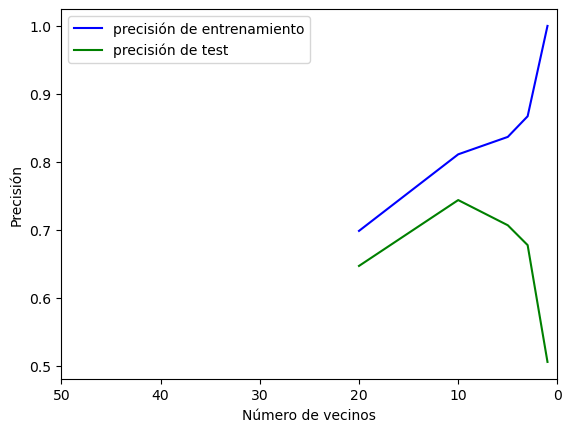

In [3]:
from sklearn.model_selection import validation_curve
n_neighbors = [1, 3, 5, 10, 20, 50]
train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, param_name="n_neighbors",
                                             param_range=n_neighbors, cv=cv)
plt.plot(n_neighbors, train_scores.mean(axis=1), 'b', label="precisión de entrenamiento")
plt.plot(n_neighbors, test_scores.mean(axis=1), 'g', label="precisión de test")
plt.ylabel('Precisión')
plt.xlabel('Número de vecinos')
plt.xlim([50, 0])
plt.legend(loc="best");

<div class="alert alert-warning">
    Observa que muchos vecinos resultan en un modelo suavizado o más simple, por lo que el eje X se ha dibujado invertido.
</div>

Si más de un parámetro es importante, como los parámetros ``C`` y ``gamma`` de una máquina de vectores soporte (SVM) (de las cuales hablaremos después), se intentan todas las posibles combinaciones de parámetros:

In [4]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR

# Hacer validación cruzada para cada combinación de parámetros:
for C in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        scores = cross_val_score(SVR(C=C, gamma=gamma), X, y, cv=cv)
        print("C: %f, gamma: %f, valor medio de R^2: %f" % (C, gamma, np.mean(scores)))

C: 0.001000, gamma: 0.001000, valor medio de R^2: -0.113910
C: 0.001000, gamma: 0.010000, valor medio de R^2: -0.061468
C: 0.001000, gamma: 0.100000, valor medio de R^2: -0.114009
C: 0.001000, gamma: 1.000000, valor medio de R^2: -0.062084
C: 0.010000, gamma: 0.001000, valor medio de R^2: -0.043720
C: 0.010000, gamma: 0.010000, valor medio de R^2: -0.049624
C: 0.010000, gamma: 0.100000, valor medio de R^2: -0.011274
C: 0.010000, gamma: 1.000000, valor medio de R^2: 0.031635
C: 0.100000, gamma: 0.001000, valor medio de R^2: -0.037147
C: 0.100000, gamma: 0.010000, valor medio de R^2: 0.111365
C: 0.100000, gamma: 0.100000, valor medio de R^2: 0.517222
C: 0.100000, gamma: 1.000000, valor medio de R^2: 0.494376
C: 1.000000, gamma: 0.001000, valor medio de R^2: 0.154187
C: 1.000000, gamma: 0.010000, valor medio de R^2: 0.595469
C: 1.000000, gamma: 0.100000, valor medio de R^2: 0.648914
C: 1.000000, gamma: 1.000000, valor medio de R^2: 0.690131
C: 10.000000, gamma: 0.001000, valor medio de R^

Como esto es algo que se hace frecuentemente en aprendizaje automático, hay una clase ya implementada en scikit-learn, ``GridSearchCV``. ``GridSearchCV`` utiliza un diccionario que describe los parámetros que deberían probarse y un modelo que entrenar.

La rejilla de parámetros se define como un diccionario, donde las claves son los parámetros y los valores son las cantidades a probar.

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=3)

Una de las cosas interesantes de GridSearchCV es que es un *meta-estimador*. Utiliza un estimador como SVR y crea un nuevo estimador que se comporta exactamente igual que SVR, por lo que podemos llamar a ``fit`` para entrenarlo:

In [6]:
grid.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.001, gamma=0.001;, score=-0.006 total time=   0.0s
[CV 2/5] END .............C=0.001, gamma=0.001;, score=-0.055 total time=   0.0s
[CV 3/5] END .............C=0.001, gamma=0.001;, score=-0.061 total time=   0.0s
[CV 4/5] END .............C=0.001, gamma=0.001;, score=-0.143 total time=   0.0s
[CV 5/5] END .............C=0.001, gamma=0.001;, score=-0.138 total time=   0.0s
[CV 1/5] END ..............C=0.001, gamma=0.01;, score=-0.003 total time=   0.0s
[CV 2/5] END ..............C=0.001, gamma=0.01;, score=-0.052 total time=   0.0s
[CV 3/5] END ..............C=0.001, gamma=0.01;, score=-0.058 total time=   0.0s
[CV 4/5] END ..............C=0.001, gamma=0.01;, score=-0.140 total time=   0.0s
[CV 5/5] END ..............C=0.001, gamma=0.01;, score=-0.135 total time=   0.0s
[CV 1/5] END ................C=0.001, gamma=0.1;, score=0.007 total time=   0.0s
[CV 2/5] END ...............C=0.001, gamma=0.1;

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             verbose=3)

``GridSearchCV`` aplica un proceso algo más complejo que el visto anteriormente. Primero, ejecuta el mismo bucle de validación cruzada para encontrar la mejor combinación de parámetros. Una vez tiene la mejor combinación, ejecuta el método ``fit`` de nuevo sobre todos los datos que se le pasan (sin validación cruzada), para construir un nuevo modelo con los parámetros óptimos obtenidos anteriormente.

Después, utilizando los métodos ``predict`` o ``score`` podemos realizar una nueva predicción:


In [7]:
grid.predict(X)

array([-1.79762875, -1.74054091, -1.71412904, -1.72272347, -1.76880247,
       -1.8527208 , -1.97255382, -2.12407501, -2.30087676, -2.49463429,
       -2.695503  , -2.89262935, -3.07474705, -3.23082299, -3.35071314,
       -3.42578612, -3.44947391, -3.41771237, -3.32924127, -3.18574205,
       -2.9918017 , -2.75470244, -2.48404785, -2.19124658, -1.88888388,
       -1.59001819, -1.30744475, -1.05297034, -0.8367425 , -0.66667333,
       -0.54799235, -0.4829551 , -0.4707249 , -0.50743515, -0.58642852,
       -0.69865919, -0.83323456, -0.97806438, -1.12057877, -1.24847261,
       -1.35043139, -1.41679516, -1.44012026, -1.41560488, -1.3413525 ,
       -1.21845724, -1.05090633, -0.84530623, -0.61045003, -0.35675398,
       -0.09559933,  0.16137852,  0.40300817,  0.61926205,  0.80185531,
        0.94472644,  1.04437082,  1.10000798,  1.11357463,  1.08954695,
        1.03460678,  0.95717608,  0.86685224,  0.7737823 ,  0.68801751,
        0.61888941,  0.57444669,  0.56098656,  0.58270777,  0.64

Puedes observar los mejores parámetros obtenidos por ``GridSearchCV`` en su atributo ``best_params_`` y la puntuación correspondiente en su atributo ``best_score_``:

In [8]:
print(grid.best_score_)

0.7294653250083266


In [9]:
print(grid.best_params_)

{'C': 10, 'gamma': 1}


Pero puedes investigar más a fondo el rendimiento y algunas cosas más sobre cada una de las combinaciones de parámetros accediendo al atributo `cv_results_`. `cv_results_` es un diccionario donde cada clave es una cadena y cada valor un array. Se puede por tanto usar para crear un ``DataFrame`` de pandas.

In [10]:
type(grid.cv_results_)

dict

In [11]:
print(grid.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [12]:
import pandas as pd

cv_results = pd.DataFrame(grid.cv_results_)
cv_results.head()

/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/ladino/opt/anaconda3/envs/Dashboard/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000922,0.000080,0.000686,0.000130,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",-0.005584,-0.054675,-0.061235,-0.143196,-0.138317,-0.080602,0.052771,20
1,0.000848,0.000053,0.000642,0.000089,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",-0.003294,-0.051892,-0.058382,-0.140002,-0.135424,-0.077799,0.052515,19
2,0.000927,0.000077,0.000634,0.000038,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.007277,-0.039835,-0.045796,-0.126078,-0.121974,-0.065281,0.051385,16
3,0.000829,0.000045,0.000585,0.000038,0.001,1,"{'C': 0.001, 'gamma': 1}",0.005950,-0.042155,-0.047682,-0.129305,-0.123049,-0.067248,0.051644,17
4,0.000884,0.000148,0.000631,0.000082,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",-0.003062,-0.051605,-0.058093,-0.139678,-0.135151,-0.077518,0.052494,18


In [13]:
cv_results_tiny = cv_results[['param_C', 'param_gamma', 'mean_test_score']]
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head()

,param_C,param_gamma,mean_test_score
19,10,1,0.729465
15,1,1,0.683200
14,1,0.1,0.628025
18,10,0.1,0.620166
17,10,0.01,0.575693


Sin embargo, hay un problema en la utilización de este rendimiento para la evaluación. Puedes estar incurriendo en lo que se denomina un error de probar varias hipótesis. Si tienes muchas combinaciones de parámetros, algunas de ellas puede ser que funcionen mejor solo por aleatoriedad y que el rendimiento que estás obteniendo no sea el mismo cuando tengamos nuevos datos. Por tanto, es en general buena idea realizar una separación en entrenamiento y test previa a la búsqueda *grid*. Este patrón se suele denominar partición de entrenamiento, test y validación, y es bastante común en aprendizaje automático:

Podemos emular este proceso fácilmente dividiendo primero los datos con ``train_test_split``, aplicando ``GridSearchCV`` al conjunto de entrenamiento, y calculando el ``score`` correspondiente solo con el conjunto de test:

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
cv = KFold(n_splits=10, shuffle=True)

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.7262035177984737

Podemos comprobar de nuevo los parámetros obtenidos con:

In [15]:
grid.best_params_

{'C': 10, 'gamma': 1}

A veces se utiliza un esquema más simple, que parte los datos en tres subconjuntos entrenamiento, validación y test. Esto es una alternativa si tu conjunto de datos es muy grande o si es imposible entrenar muchos modelos mediante validación cruzada, porque entrenar cada modelo es muy costoso computacionalmente. Para hacer este tipo de partición tendríamos que hacer una partición con ``train_test_split`` y después aplicar ``GridSearchCV`` con un ``ShuffleSplit`` y una sola iteración:


In [16]:
from sklearn.model_selection import train_test_split, ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
single_split_cv = ShuffleSplit(n_splits=1)

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=single_split_cv, verbose=3)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)

Fitting 1 folds for each of 20 candidates, totalling 20 fits
[CV 1/1] END .............C=0.001, gamma=0.001;, score=-0.789 total time=   0.0s
[CV 1/1] END ..............C=0.001, gamma=0.01;, score=-0.788 total time=   0.0s
[CV 1/1] END ...............C=0.001, gamma=0.1;, score=-0.781 total time=   0.0s
[CV 1/1] END .................C=0.001, gamma=1;, score=-0.779 total time=   0.0s
[CV 1/1] END ..............C=0.01, gamma=0.001;, score=-0.788 total time=   0.0s
[CV 1/1] END ...............C=0.01, gamma=0.01;, score=-0.778 total time=   0.0s
[CV 1/1] END ................C=0.01, gamma=0.1;, score=-0.724 total time=   0.0s
[CV 1/1] END ..................C=0.01, gamma=1;, score=-0.695 total time=   0.0s
[CV 1/1] END ...............C=0.1, gamma=0.001;, score=-0.778 total time=   0.0s
[CV 1/1] END ................C=0.1, gamma=0.01;, score=-0.696 total time=   0.0s
[CV 1/1] END ..................C=0.1, gamma=0.1;, score=0.009 total time=   0.0s
[CV 1/1] END ....................C=0.1, gamma=1;

0.7262035177984737

Esto es mucho más rápido pero puede resultar en valores peores de los hiper-parámetros y, por tanto, peores resultados.

In [17]:
clf = GridSearchCV(SVR(), param_grid=param_grid)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7262035177984737

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Aplica una búsqueda *grid* para encontrar el mejor valor del parámetro número de vecinos para el ``KNeighborsClassifier`` para el dataset de ``digits``.
      </li>
    </ul>
</div>